In [1]:
import pandas as pd

C:\Users\Admin\ANACONDA\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [8]:
!pip install gensim

     ---------------------------------------- 59.6/59.6 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for fst-pso: filename=fst_pso-1.8.1-py3-none-any.whl size=20448 sha256=cc14480c455c2e30ac962b264a72a8bbaa24451c5fddc0c2965d28c962741491
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\01\02\ee\df0699282986903a384b69aab4413af9efd26b3612b5dccc9e
  Created wheel for miniful: filename=miniful-0.0.6-py3-none-any.whl size=3522 sha256=ce3ca935267a1bcbbb655f6afffa061312a51b5d840a0fc8963a1f5bb17e6373
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\43\aa\48\5c66b931ff013ad19774081aa19656637af5c0cc33b5494b30
Successfully built fst-pso miniful


In [40]:
!pip install pyldavis

In [ ]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
# df = pd.read_csv('train_processed_data.csv')
df = pd.read_csv('pre-processed_df_train_Final.csv')

In [12]:
df_train_processed = df.copy() #index_col=False

In [13]:
df_train_processed.columns

Index(['Unnamed: 0', 'Content', 'Label', 'preprocessed_review'], dtype='object')

In [14]:
df_train_processed = df_train_processed.drop(columns=['Unnamed: 0'])

In [15]:
df_train_processed

Content     Label  \
0      Bromwell High is a cartoon comedy. It ran at t...  Positive   
1      Homelessness (or Houselessness as George Carli...  Positive   
2      Brilliant over-acting by Lesley Ann Warren. Be...  Positive   
3      This is easily the most underrated film inn th...  Positive   
4      This is not the typical Mel Brooks film. It wa...  Positive   
...                                                  ...       ...   
24995  Towards the end of the movie, I felt it was to...  Negative   
24996  This is the kind of movie that my enemies cont...  Negative   
24997  I saw 'Descent' last night at the Stockholm Fi...  Negative   
24998  Some films that you pick up for a pound turn o...  Negative   
24999  This is one of the dumbest films, I've ever se...  Negative   

                                     preprocessed_review  
0      bromwell high cartoon comedy ran time program ...  
1      homelessness houselessness george carlin state...  
2      brilliant overacting lesley ann warren best dr...  
3      easily underrated film inn brooks cannon sure ...  
4      typical mel brooks film much le slapstick movi...  
...                                                  ...  
24995  towards end movie felt technical felt like cla...  
24996  kind movie enemy content watch time bloody tru...  
24997  saw descent last night stockholm film festival...  
24998  film pick pound turn rather good rd century fi...  
24999  one dumbest film ive ever seen rip nearly ever...  

[25000 rows x 3 columns]

In [16]:
df_train_processed['preprocessed_review'][0]

'bromwell high cartoon comedy ran time program school life teachers year teaching profession lead believe bromwell highs satire much closer reality teachers scramble survive financially insightful student see right pathetic teacher pomp pettiness whole situation remind school knew student saw episode student repeatedly tried burn school immediately recalled high classic line inspector im sack one teacher student welcome bromwell high expect many adult age think bromwell high far fetched pity isnt'

In [17]:
df_test_processed = pd.read_csv('pre-processed_df_test_Final.csv')

In [18]:
df_test_processed.columns

Index(['Unnamed: 0', 'Content', 'Label', 'preprocessed_review'], dtype='object')

In [19]:
df_test_processed = df_test_processed.drop(columns=['Unnamed: 0'])

In [20]:
df_test_processed

Content     Label  \
0      I went and saw this movie last night after bei...  Positive   
1      Actor turned director Bill Paxton follows up h...  Positive   
2      As a recreational golfer with some knowledge o...  Positive   
3      I saw this film in a sneak preview, and it is ...  Positive   
4      Bill Paxton has taken the true story of the 19...  Positive   
...                                                  ...       ...   
24995  I occasionally let my kids watch this garbage ...  Negative   
24996  When all we have anymore is pretty much realit...  Negative   
24997  The basic genre is a thriller intercut with an...  Negative   
24998  Four things intrigued me as to this film - fir...  Negative   
24999  David Bryce's comments nearby are exceptionall...  Negative   

                                     preprocessed_review  
0      went saw movie last night coaxed friend mine i...  
1      actor turned director bill paxton follows prom...  
2      recreational golfer knowledge sport history pl...  
3      saw film sneak preview delightful cinematograp...  
4      bill paxton taken true story us golf open made...  
...                                                  ...  
24995  occasionally let kid watch garbage understand ...  
24996  anymore pretty much reality tv show people mak...  
24997  basic genre thriller intercut uncomfortable me...  
24998  four thing intrigued film firstly star carly p...  
24999  david bryces comment nearby exceptionally well...  

[25000 rows x 3 columns]

### performing text representation using Bag-of-Words (BoW) and Term Frequency-Inverse Document Frequency (TF-IDF) methods

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Example data
train_processed_reviews = df_train_processed['preprocessed_review']
test_processed_reviews = df_test_processed['preprocessed_review']

# Maximum number of features
max_features = 10000  # Example: Maximum of 1000 features

# Bag-of-Words (BoW) representation
# Initialize the CountVectorizer
count_vectorizer = CountVectorizer(ngram_range=(1, 2), max_features=max_features) #Uni-grams, Bi-grams, and Tri-grams#

# Fit and transform the training data
train_bow = count_vectorizer.fit_transform(train_processed_reviews)

# Transform the test data
test_bow = count_vectorizer.transform(test_processed_reviews)

# Term Frequency-Inverse Document Frequency (TF-IDF) representation
# Initialize the TfidfVectorizer
# tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,3), max_features=max_features)  #Uni-grams, Bi-grams, and Tri-grams#
# Fit and transform the training data
train_tfidf = tfidf_vectorizer.fit_transform(train_processed_reviews)

# Transform the test data
test_tfidf = tfidf_vectorizer.transform(test_processed_reviews)

# You can access the feature names if needed
feature_names_tfidf = tfidf_vectorizer.get_feature_names_out()

# Now, train_bow and test_bow contain BoW representations
# Similarly, train_tfidf and test_tfidf contain TF-IDF representations


#### The n-gram features printed represent the most frequent n-grams (uni-grams, bi-grams, and tri-grams) extracted from the preprocessed reviews. These features will be used to represent the text data for further analysis, such as machine learning models.

In [12]:
# Printing initial few n-gram features for CountVectorizer
print("Initial few n-gram features from CountVectorizer:")
print(count_vectorizer.get_feature_names_out()[:10])  # Print first 10 n-gram features as an example

# Printing initial few n-gram features for TfidfVectorizer
print("Initial few n-gram features from TfidfVectorizer:")
print(tfidf_vectorizer.get_feature_names_out()[:10])  # Print first 10 n-gram features as an example


Initial few n-gram features from CountVectorizer:
['abandon' 'abandoned' 'abc' 'ability' 'able' 'able get' 'able see'
 'abomination' 'abortion' 'abound']
Initial few n-gram features from TfidfVectorizer:
['abandon' 'abandoned' 'abc' 'ability' 'able' 'able get' 'able see'
 'abomination' 'abortion' 'abound']


In [13]:
# # Printing initial few n-gram features for CountVectorizer
# print("Initial few n-gram features from CountVectorizer:")
# print(count_vectorizer.get_feature_names_out()[:10])  # Print first 10 n-gram features as an example

# Printing initial few n-gram features for TfidfVectorizer
print("Initial few n-gram features from TfidfVectorizer:")
print(tfidf_vectorizer.get_feature_names_out()[:20])  # Print first 10 n-gram features as an example


Initial few n-gram features from TfidfVectorizer:
['abandon' 'abandoned' 'abc' 'ability' 'able' 'able get' 'able see'
 'abomination' 'abortion' 'abound' 'aboutbr' 'aboutbr br' 'abraham'
 'abrupt' 'abruptly' 'absence' 'absent' 'absolute' 'absolutely'
 'absolutely loved']


In [14]:
# Access feature names for TF-IDF
feature_names_tfidf = tfidf_vectorizer.get_feature_names_out()

# Print TF-IDF representation for the first document in the training set
print("TF-IDF representation for the first document in the training set:")
print(train_tfidf[0])

# Access feature names for BoW
feature_names_bow = count_vectorizer.get_feature_names_out()

# Print Bag-of-Words (BoW) representation for the first document in the training set
print("Bag-of-Words (BoW) representation for the first document in the training set:")
print(train_bow[0])

TF-IDF representation for the first document in the training set:
  (0, 4653)	0.07752183805836872
  (0, 6755)	0.13708238641230416
  (0, 3122)	0.07885113634757546
  (0, 8878)	0.05892274207132042
  (0, 182)	0.09850583035225241
  (0, 153)	0.10822298953204179
  (0, 5470)	0.06165680848704953
  (0, 3002)	0.09888640853605701
  (0, 9627)	0.13765394338815687
  (0, 6353)	0.037356896065390825
  (0, 4415)	0.06891308033454667
  (0, 4554)	0.15199201999875084
  (0, 5164)	0.07720309786663485
  (0, 1634)	0.08798819405586092
  (0, 4447)	0.12008389073784272
  (0, 1269)	0.1432375940733293
  (0, 9144)	0.10873017493178179
  (0, 7401)	0.15075425394741945
  (0, 2833)	0.0934453057025411
  (0, 7698)	0.07619364906720566
  (0, 4887)	0.10483108726254593
  (0, 7379)	0.14443878576622035
  (0, 8109)	0.10083761492970385
  (0, 9690)	0.07723930927328482
  (0, 8755)	0.25852736456339465
  (0, 6610)	0.12092605494736393
  (0, 7512)	0.07569610059793241
  (0, 7824)	0.05008429279711393
  (0, 8530)	0.45715662179556626
  (0, 454

In [15]:
train_tfidf.shape  

(25000, 10000)

In [16]:
test_tfidf.shape

(25000, 10000)

# Applying ML Models :

# First, let's start with SVM:

In [8]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize the SVM model
svm_model = SVC(kernel='linear')

# Train the SVM model using BoW representation
svm_model.fit(train_bow, df_train_processed['Label'])

# Predictions on the test set
svm_predictions_bow = svm_model.predict (test_bow)

# Calculate accuracy
svm_accuracy_bow = accuracy_score(df_test_processed['Label'], svm_predictions_bow)

print("SVM Accuracy with BoW:", svm_accuracy_bow) 

SVM Accuracy with BoW: 0.81804


In [9]:
 from sklearn.metrics import classification_report

# Calculate and print the classification report
print("Classification Report for SVM with BoW:")
print(classification_report(df_test_processed['Label'], svm_predictions_bow))

Classification Report for SVM with BoW:
              precision    recall  f1-score   support

    Negative       0.81      0.83      0.82     12500
    Positive       0.83      0.80      0.81     12500

    accuracy                           0.82     25000
   macro avg       0.82      0.82      0.82     25000
weighted avg       0.82      0.82      0.82     25000



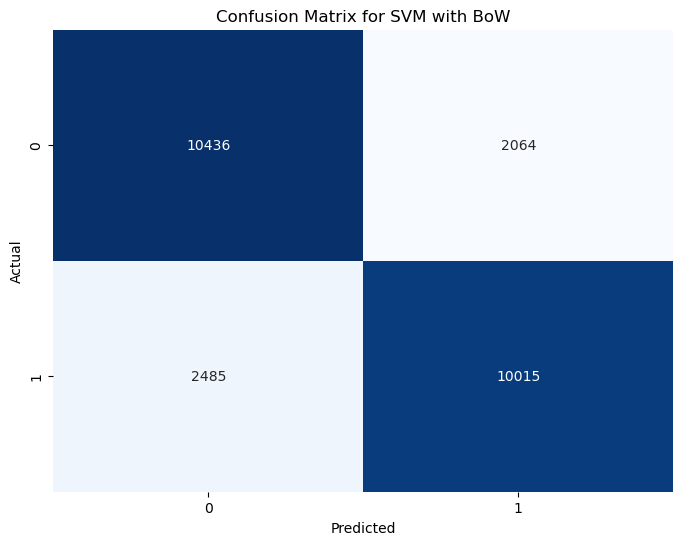

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
conf_matrix = confusion_matrix(df_test_processed['Label'], svm_predictions_bow)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM with BoW')
plt.show()


In [10]:
# Train the SVM model using TF-IDF representation
svm_model.fit(train_tfidf, df_train_processed['Label'])

# Predictions on the test set
svm_predictions_tfidf = svm_model.predict(test_tfidf)

# Calculate accuracy
svm_accuracy_tfidf = accuracy_score(df_test_processed['Label'], svm_predictions_tfidf)

print("SVM Accuracy with TF-IDF:", svm_accuracy_tfidf)

SVM Accuracy with TF-IDF: 0.86992


In [11]:
# from sklearn.metrics import classification_report

# Calculate and print the classification report
print("Classification Report for SVM with TF-IDF:")
print(classification_report(df_test_processed['Label'], svm_predictions_tfidf))

Classification Report for SVM with TF-IDF:
              precision    recall  f1-score   support

    Negative       0.87      0.87      0.87     12500
    Positive       0.87      0.87      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



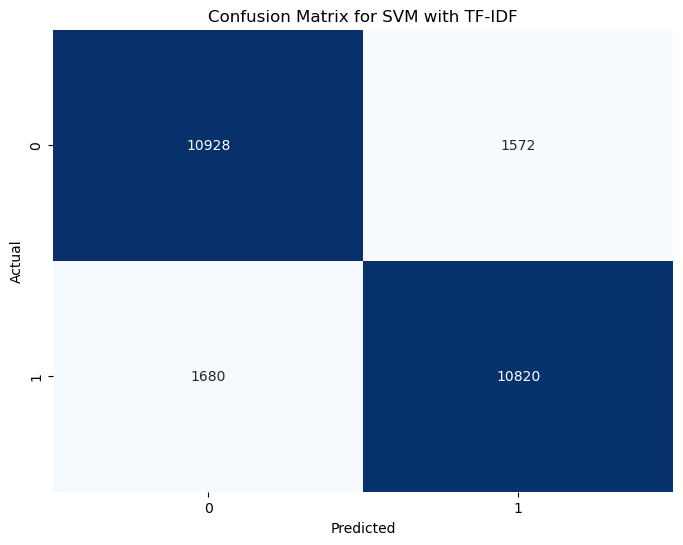

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
conf_matrix = confusion_matrix(df_test_processed['Label'], svm_predictions_tfidf)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM with TF-IDF')
plt.show()


# Next, let's apply Naive Bayes:

In [13]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Naive Bayes model
nb_model = MultinomialNB()

# Train the Naive Bayes model using BoW representation
nb_model.fit(train_bow, df_train_processed['Label'])

# Predictions on the test set
nb_predictions_bow = nb_model.predict(test_bow)

# Calculate accuracy
nb_accuracy_bow = accuracy_score(df_test_processed['Label'], nb_predictions_bow)

print("Naive Bayes Accuracy with BoW:", nb_accuracy_bow)


Naive Bayes Accuracy with BoW: 0.8374


In [14]:
# from sklearn.metrics import classification_report

# Calculate and print the classification report
print("Classification Report for Naive Bayes with BoW:")
print(classification_report(df_test_processed['Label'], nb_predictions_bow))


Classification Report for Naive Bayes with BoW:
              precision    recall  f1-score   support

    Negative       0.82      0.86      0.84     12500
    Positive       0.85      0.81      0.83     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000



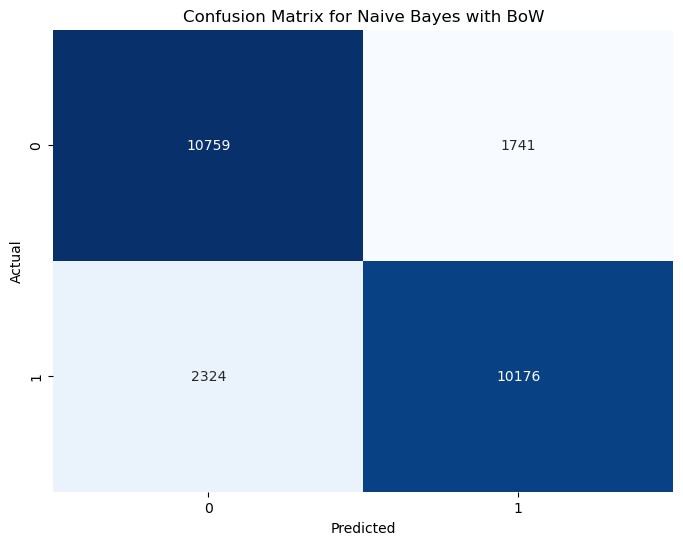

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
conf_matrix = confusion_matrix(df_test_processed['Label'], nb_predictions_bow)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes with BoW')
plt.show()


In [16]:
# Train the Naive Bayes model using TF-IDF representation
nb_model.fit(train_tfidf, df_train_processed['Label'])

# Predictions on the test set
nb_predictions_tfidf = nb_model.predict(test_tfidf)

# Calculate accuracy
nb_accuracy_tfidf = accuracy_score(df_test_processed['Label'], nb_predictions_tfidf)

print("Naive Bayes Accuracy with TF-IDF:", nb_accuracy_tfidf)

Naive Bayes Accuracy with TF-IDF: 0.84132


In [17]:
# from sklearn.metrics import classification_report

# Calculate and print the classification report
print("Classification Report for Naive Bayes with TF-IDF:")
print(classification_report(df_test_processed['Label'], nb_predictions_tfidf))

Classification Report for Naive Bayes with TF-IDF:
              precision    recall  f1-score   support

    Negative       0.83      0.85      0.84     12500
    Positive       0.85      0.83      0.84     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000



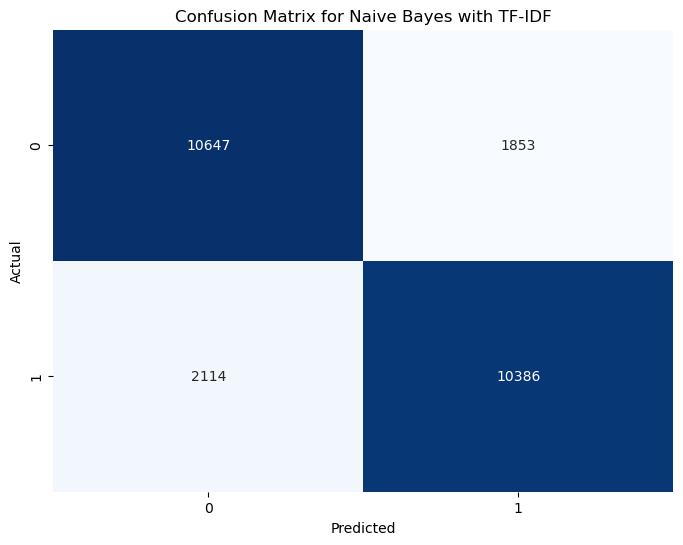

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
conf_matrix = confusion_matrix(df_test_processed['Label'], nb_predictions_tfidf)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes with TF-IDF')
plt.show()


# Finally, let's apply Logistic Regression:

In [18]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)

# Train the Logistic Regression model using BoW representation
lr_model.fit(train_bow, df_train_processed['Label'])

# Predictions on the test set
lr_predictions_bow = lr_model.predict(test_bow)

# Calculate accuracy
lr_accuracy_bow = accuracy_score(df_test_processed['Label'], lr_predictions_bow)

print("Logistic Regression Accuracy with BoW:", lr_accuracy_bow)

Logistic Regression Accuracy with BoW: 0.84596


In [19]:
# from sklearn.metrics import classification_report

# Calculate and print the classification report
print("Classification Report for Logistic Regression with BoW:")
print(classification_report(df_test_processed['Label'], lr_predictions_bow))


Classification Report for Logistic Regression with BoW:
              precision    recall  f1-score   support

    Negative       0.84      0.86      0.85     12500
    Positive       0.85      0.84      0.84     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



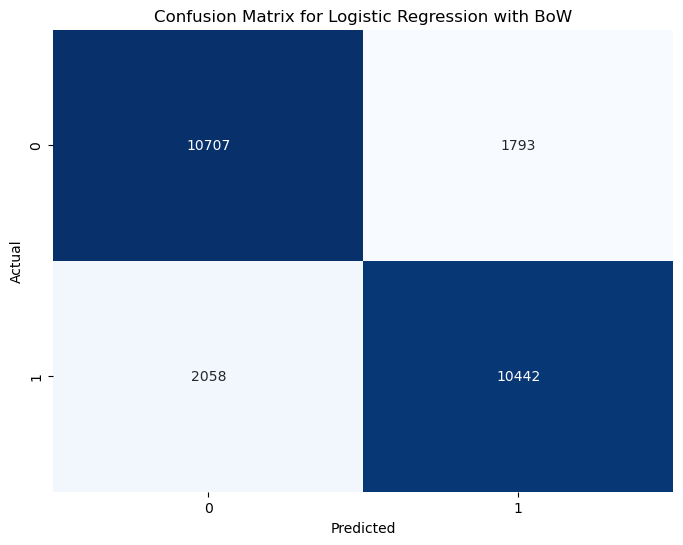

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
conf_matrix = confusion_matrix(df_test_processed['Label'], lr_predictions_bow)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression with BoW')
plt.show()


In [20]:
# Train the Logistic Regression model using TF-IDF representation
lr_model.fit(train_tfidf, df_train_processed['Label'])

# Predictions on the test set
lr_predictions_tfidf = lr_model.predict(test_tfidf)

# Calculate accuracy
lr_accuracy_tfidf = accuracy_score(df_test_processed['Label'], lr_predictions_tfidf)

print("Logistic Regression Accuracy with TF-IDF:", lr_accuracy_tfidf)


Logistic Regression Accuracy with TF-IDF: 0.87696


In [21]:
# from sklearn.metrics import classification_report

# Calculate and print the classification report
print("Classification Report for Logistic Regression with TF-IDF:")
print(classification_report(df_test_processed['Label'], lr_predictions_tfidf))


Classification Report for Logistic Regression with TF-IDF:
              precision    recall  f1-score   support

    Negative       0.88      0.87      0.88     12500
    Positive       0.87      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



In [ ]:
# from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
conf_matrix = confusion_matrix(df_test_processed['Label'], lr_predictions_tfidf)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression with TF-IDF')
plt.show()


# Topic Modeling

In [ ]:
### Merge Preprocessed train and test set

In [21]:

import pandas as pd

# Concatenate the training and test datasets
dftrain_test_processed = pd.concat([df_train_processed, df_test_processed], ignore_index=True)

# Display the merged dataset
# print(df_merged)


In [22]:
dftrain_test_processed

Content     Label  \
0      Bromwell High is a cartoon comedy. It ran at t...  Positive   
1      Homelessness (or Houselessness as George Carli...  Positive   
2      Brilliant over-acting by Lesley Ann Warren. Be...  Positive   
3      This is easily the most underrated film inn th...  Positive   
4      This is not the typical Mel Brooks film. It wa...  Positive   
...                                                  ...       ...   
49995  I occasionally let my kids watch this garbage ...  Negative   
49996  When all we have anymore is pretty much realit...  Negative   
49997  The basic genre is a thriller intercut with an...  Negative   
49998  Four things intrigued me as to this film - fir...  Negative   
49999  David Bryce's comments nearby are exceptionall...  Negative   

                                     preprocessed_review  
0      bromwell high cartoon comedy ran time program ...  
1      homelessness houselessness george carlin state...  
2      brilliant overacting lesley ann warren best dr...  
3      easily underrated film inn brooks cannon sure ...  
4      typical mel brooks film much le slapstick movi...  
...                                                  ...  
49995  occasionally let kid watch garbage understand ...  
49996  anymore pretty much reality tv show people mak...  
49997  basic genre thriller intercut uncomfortable me...  
49998  four thing intrigued film firstly star carly p...  
49999  david bryces comment nearby exceptionally well...  

[50000 rows x 3 columns]

In [23]:
from gensim import corpora, models
import gensim

# Prepare the corpus
train_corpus = [doc.split() for doc in df_train_processed['preprocessed_review']]
test_corpus = [doc.split() for doc in df_test_processed['preprocessed_review']]


In [24]:
train_corpus

[['bromwell',
  'high',
  'cartoon',
  'comedy',
  'ran',
  'time',
  'program',
  'school',
  'life',
  'teachers',
  'year',
  'teaching',
  'profession',
  'lead',
  'believe',
  'bromwell',
  'highs',
  'satire',
  'much',
  'closer',
  'reality',
  'teachers',
  'scramble',
  'survive',
  'financially',
  'insightful',
  'student',
  'see',
  'right',
  'pathetic',
  'teacher',
  'pomp',
  'pettiness',
  'whole',
  'situation',
  'remind',
  'school',
  'knew',
  'student',
  'saw',
  'episode',
  'student',
  'repeatedly',
  'tried',
  'burn',
  'school',
  'immediately',
  'recalled',
  'high',
  'classic',
  'line',
  'inspector',
  'im',
  'sack',
  'one',
  'teacher',
  'student',
  'welcome',
  'bromwell',
  'high',
  'expect',
  'many',
  'adult',
  'age',
  'think',
  'bromwell',
  'high',
  'far',
  'fetched',
  'pity',
  'isnt'],
 ['homelessness',
  'houselessness',
  'george',
  'carlin',
  'stated',
  'issue',
  'year',
  'never',
  'plan',
  'help',
  'street',
  'con

In [25]:
# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(train_corpus)

In [26]:
# Iterate over dictionary items and print them
for token, token_id in dictionary.items():
    print(token, token_id)


0 adult
1 age
2 believe
3 bromwell
4 burn
5 cartoon
6 classic
7 closer
8 comedy
9 episode
10 expect
11 far
12 fetched
13 financially
14 high
15 highs
16 im
17 immediately
18 insightful
19 inspector
20 isnt
21 knew
22 lead
23 life
24 line
25 many
26 much
27 one
28 pathetic
29 pettiness
30 pity
31 pomp
32 profession
33 program
34 ran
35 reality
36 recalled
37 remind
38 repeatedly
39 right
40 sack
41 satire
42 saw
43 school
44 scramble
45 see
46 situation
47 student
48 survive
49 teacher
50 teachers
51 teaching
52 think
53 time
54 tried
55 welcome
56 whole
57 year
58 agreement
59 already
60 ann
61 bathroom
62 bet
63 blazing
64 bolt
65 bolts
66 br
67 bracelet
68 brooks
69 building
70 cant
71 carlin
72 cause
73 character
74 compared
75 computer
76 connection
77 considered
78 day
79 deciding
80 directs
81 divorce
82 dont
83 election
84 end
85 entertainment
86 every
87 everything
88 exdancer
89 fight
90 film
91 flight
92 forehead
93 found
94 frankenstein
95 fumes
96 future
97 george
98 give
9

In [27]:
print("Number of unique tokens:", len(dictionary))

Number of unique tokens: 113187


In [28]:
# Filter out tokens that appear in less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=20, no_above=0.5)

In [29]:
# Bag-of-words representation of the documents.
bow_corpus = [dictionary.doc2bow(doc) for doc in train_corpus]

# In a Bag-of-Words model, each unique word in the document is represented by an index in the dictionary, 
# and the count of each word in the document is stored as a tuple of (word_index, word_count). 
# So, doc2bow converts each document into a list of tuples representing the word indices and 
# their corresponding frequencies in that document.

In [30]:
# Gensim creates a unique id for each word in the document. 
# The produced corpus shown below is a mapping of (word_id, word_frequency).
bow_corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 4),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 3),
  (38, 1),
  (39, 1),
  (40, 4),
  (41, 1),
  (42, 2),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1)],
 [(7, 1),
  (18, 1),
  (21, 1),
  (37, 1),
  (38, 2),
  (44, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 4),
  (55, 1),
  (56, 6),
  (57, 2),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 2),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 3),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 2)

In [31]:
# Bag-of-words representation of the documents.
bow_corpus_human_readable = []

for doc in bow_corpus:
    bow_doc = [(dictionary[id], freq) for id, freq in doc]
    bow_corpus_human_readable.append(bow_doc)

# Print the first few documents in a human-readable format
for i, doc in enumerate(bow_corpus_human_readable[:5]):
    print(f"Document {i + 1}:")
    for word, freq in doc:
        print(f"    {word}: {freq}")


Document 1:
    adult: 1
    age: 1
    believe: 1
    burn: 1
    cartoon: 1
    classic: 1
    closer: 1
    comedy: 1
    episode: 1
    expect: 1
    far: 1
    fetched: 1
    financially: 1
    high: 4
    im: 1
    immediately: 1
    insightful: 1
    inspector: 1
    isnt: 1
    knew: 1
    lead: 1
    life: 1
    line: 1
    many: 1
    much: 1
    pathetic: 1
    pity: 1
    profession: 1
    program: 1
    ran: 1
    reality: 1
    remind: 1
    repeatedly: 1
    right: 1
    sack: 1
    satire: 1
    saw: 1
    school: 3
    see: 1
    situation: 1
    student: 4
    survive: 1
    teacher: 2
    teaching: 1
    think: 1
    time: 1
    tried: 1
    welcome: 1
    whole: 1
    year: 1
Document 2:
    comedy: 1
    isnt: 1
    life: 1
    school: 1
    see: 2
    think: 1
    year: 1
    agreement: 1
    already: 1
    ann: 1
    bathroom: 1
    bet: 4
    blazing: 1
    bolt: 6
    brooks: 2
    building: 1
    cant: 1
    cause: 1
    character: 1
    compared: 1
    comput

In [32]:
dictionary[5]

'classic'

In [33]:
# TF-IDF representation of the documents.
tfidf = models.TfidfModel(bow_corpus)
tfidf_corpus = tfidf[bow_corpus]


# models.TfidfModel(bow_corpus): 
#     This line creates a TF-IDF model using the Bag-of-Words corpus (bow_corpus). 
# In this model, each term's frequency (TF) is multiplied by its inverse document frequency (IDF) to give a 
# weight to each term in each document. Terms that appear frequently in a document but rarely in the entire 
# corpus are given higher weights, while terms that appear in many documents are given lower weights.

# tfidf_corpus = tfidf[bow_corpus]: 
#     This line applies the TF-IDF model to the Bag-of-Words corpus (bow_corpus) 
# to transform it into a TF-IDF representation. Each document in the BoW corpus is converted into a TF-IDF 
# vector, where each element represents the TF-IDF weight of a term in that document.

In [34]:
# LDA model using Bag-of-Words representation
lda_model_bow = gensim.models.LdaMulticore(bow_corpus, 
                                           num_topics=10, 
                                           id2word=dictionary, 
                                           passes=2, workers=2)


In [35]:
# LDA model using TF-IDF representation
lda_model_tfidf = gensim.models.LdaMulticore(tfidf_corpus, 
                                             num_topics=10,  
                                             id2word=dictionary, 
                                             passes=2, workers=2)

In [36]:
# Print topics for each model
print("LDA Topics using Bag-of-Words representation:")
for idx, topic in lda_model_bow.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

print("\nLDA Topics using TF-IDF representation:")
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))


LDA Topics using Bag-of-Words representation:
Topic: 0 
Words: 0.014*"like" + 0.011*"bad" + 0.009*"good" + 0.009*"even" + 0.007*"really" + 0.007*"would" + 0.007*"time" + 0.006*"acting" + 0.006*"make" + 0.006*"character"
Topic: 1 
Words: 0.010*"even" + 0.006*"could" + 0.006*"original" + 0.006*"time" + 0.006*"much" + 0.006*"really" + 0.006*"like" + 0.005*"first" + 0.005*"story" + 0.005*"character"
Topic: 2 
Words: 0.009*"time" + 0.006*"see" + 0.006*"people" + 0.006*"would" + 0.005*"like" + 0.004*"get" + 0.004*"go" + 0.004*"also" + 0.003*"new" + 0.003*"even"
Topic: 3 
Words: 0.006*"character" + 0.006*"man" + 0.005*"like" + 0.005*"scene" + 0.005*"woman" + 0.004*"time" + 0.004*"also" + 0.004*"seems" + 0.004*"make" + 0.003*"much"
Topic: 4 
Words: 0.007*"good" + 0.006*"get" + 0.005*"time" + 0.005*"scene" + 0.005*"role" + 0.005*"like" + 0.004*"best" + 0.004*"make" + 0.004*"look" + 0.004*"actor"
Topic: 5 
Words: 0.024*"show" + 0.013*"book" + 0.008*"character" + 0.007*"series" + 0.007*"story" + 

# The LDA topics generated using TF-IDF representation seem to capture various aspects of sentiment and discussion within IMDb reviews. 
Here's a breakdown of the observations:

Topics 0, 1, 5, and 6: These topics appear to revolve around opinions on the quality of movies, with words like "bad," "good," "watch," "like," "think,"
and "scene" being prominent. It suggests that reviewers are expressing their views on different aspects of movies, such as storyline, characters, and 
overall enjoyment.

Topics 2 and 3: These topics seem to focus more on positive aspects of movies, with words like "story," "good," "character," "play," "great," and "love" 
being prevalent. They likely represent discussions about well-received movies, their narratives, and the portrayal of characters.

Topic 4: This topic appears to be more specific, mentioning various names like "tarzan," "wayans," "ariel," and "naschy." It could indicate discussions 
about specific movies, actors, or directors within the IMDb reviews dataset.

Topics 7 and 8: These topics contain words like "waste," "awful," and specific names like "goldie hawn" and "paulie." They seem to capture negative 
sentiments and possibly mention particular movies or actors that received poor reviews.

Topic 9: This topic again emphasizes opinions on movie elements like scenes, characters, plot, and overall quality.

In [37]:
from gensim.models.coherencemodel import CoherenceModel

# Compute coherence scores for the LDA model with Bag-of-Words representation
coherence_model_lda_bow = CoherenceModel(model=lda_model_bow, texts=train_corpus, dictionary=dictionary, coherence='c_v')
coherence_lda_bow_train = coherence_model_lda_bow.get_coherence()

# Compute coherence scores for the LDA model with TF-IDF representation
coherence_model_lda_tfidf = CoherenceModel(model=lda_model_tfidf, texts=train_corpus, dictionary=dictionary, coherence='c_v')
coherence_lda_tfidf_train = coherence_model_lda_tfidf.get_coherence()

print("Coherence Score on Train Set (BoW):", coherence_lda_bow_train)
print("Coherence Score on Train Set (TF-IDF):", coherence_lda_tfidf_train)
 

Coherence Score on Train Set (BoW): 0.2930762943933577
Coherence Score on Train Set (TF-IDF): 0.388326961728091


In [ ]:
# The coherence scores provide an indication of how coherent and interpretable the topics are within each model. 
# In this case, the LDA model trained with TF-IDF representation has a higher coherence score (0.388) compared 
# to the model trained with Bag-of-Words representation (0.293), suggesting that the topics generated by the 
# TF-IDF model are more interpretable and coherent.

In [38]:
# Calculate perplexity for the LDA model with Bag-of-Words representation on train set
perplexity_lda_bow_train = lda_model_bow.log_perplexity(bow_corpus)
print("Perplexity on Train Set (BoW):", perplexity_lda_bow_train)

# Calculate perplexity for the LDA model with TF-IDF representation on train set
perplexity_lda_tfidf_train = lda_model_tfidf.log_perplexity(tfidf_corpus)
print("Perplexity on Train Set (TF-IDF):", perplexity_lda_tfidf_train)


Perplexity on Train Set (BoW): -8.05139123389819
Perplexity on Train Set (TF-IDF): -9.825463919253613


In [ ]:
# Perplexity scores give an indication of how well the model generalizes to unseen data. Lower perplexity scores 
# suggest that the model is better at predicting unseen documents. Typically, TF-IDF-based models tend to have 
# lower perplexity compared to Bag-of-Words-based models, as TF-IDF representation captures the importance of 
# terms more effectively.

In [37]:
from sklearn.metrics.pairwise import cosine_similarity

# Get the topic-word distributions for each topic
topic_word_dists_bow = lda_model_bow.get_topics()
topic_word_dists_tfidf = lda_model_tfidf.get_topics()

# Compute pairwise cosine similarity between topic vectors
topic_similarity_bow = cosine_similarity(topic_word_dists_bow)
topic_similarity_tfidf = cosine_similarity(topic_word_dists_tfidf)

# Compute average pairwise cosine similarity
average_similarity_bow = (topic_similarity_bow.sum() - topic_similarity_bow.shape[0]) / (topic_similarity_bow.shape[0] * (topic_similarity_bow.shape[0] - 1))
average_similarity_tfidf = (topic_similarity_tfidf.sum() - topic_similarity_tfidf.shape[0]) / (topic_similarity_tfidf.shape[0] * (topic_similarity_tfidf.shape[0] - 1))

print("Average Topic Similarity (BoW):", average_similarity_bow)
print("Average Topic Similarity (TF-IDF):", average_similarity_tfidf)


Average Topic Similarity (BoW): 0.8105669657389323
Average Topic Similarity (TF-IDF): 0.7795138041178385


In [ ]:
# The average topic similarity provides an indication of how similar the topics are to each other within each representation. 
# Higher similarity values suggest that the topics are more similar to each other, 
# while lower values indicate greater diversity among topics.

In [49]:
# import pyLDAvis.gensim_models as gensimvis
# import pyLDAvis

# # Visualize LDA model trained on Bag-of-Words representation
# lda_display_bow = gensimvis.prepare(lda_model_bow, bow_corpus, dictionary, sort_topics=False)
# pyLDAvis.display(lda_display_bow) 

# Visualizing the topics generated by the LDA model trained with TF-IDF representation using the PyLDAVis library.

In [42]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model_tfidf, tfidf_corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.037297 -0.006845       1        1  58.301393
0     -0.073435 -0.009867       2        1  22.882769
3     -0.031644  0.050527       3        1   5.345691
5     -0.021242  0.007518       4        1   3.125839
4     -0.013109 -0.025773       5        1   2.385646
8     -0.001063  0.009585       6        1   1.740206
7      0.007911 -0.027880       7        1   1.713946
1      0.041969 -0.042018       8        1   1.606891
2      0.052125  0.040430       9        1   1.525411
6      0.075785  0.004323      10        1   1.372207, topic_info=           Term        Freq       Total Category  logprob  loglift
205        good  334.000000  334.000000  Default  30.0000  30.0000
144        show  283.000000  283.000000  Default  29.0000  29.0000
261       story  310.000000  310.000000  Default  28.0000  28.0000
61    character  328.000000  328.000000  Default  27.0000  27.0000
103        like  356.000000  356.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
8992     bacall    4.690919    9.417846  Topic10  -6.3173   3.5918
9302     buster    4.234708    9.320747  Topic10  -6.4197   3.4998
5373       chan    4.358956   12.654410  Topic10  -6.3907   3.2230
5376     jackie    4.627981   16.772259  Topic10  -6.3309   3.0011
1125       foxx    3.744196    9.348050  Topic10  -6.5428   3.3738

[706 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
11020      5  0.831291  abomination
10078      7  0.678910   aboriginal
5198       1  0.834179       absurd
5198       2  0.055612       absurd
5198       4  0.027806       absurd
...      ...       ...          ...
8345       7  0.010191       zombie
8345       8  0.010191       zombie
8345       9  0.030574       zombie
7762       1  0.987668      zombies
6024       2  0.831210        zorro

[1561 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 1, 4, 6, 5, 9, 8, 2, 3, 7])